In [25]:
#imports
#numpy, pandas, scipy, math, matplotlib

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns


#estimators

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


#model metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

#cross validation

from sklearn.model_selection import train_test_split

In [2]:
#data

rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Remover columnas

del rawData['ID']

In [4]:
# renombrar la columna

rawData = rawData.rename(columns={'default payment next month': 'Default_Payment'})

In [5]:
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')

rawData['PAY_0'] = rawData['PAY_0'].astype('category')
rawData['PAY_2'] = rawData['PAY_2'].astype('category')
rawData['PAY_3'] = rawData['PAY_3'].astype('category')
rawData['PAY_4'] = rawData['PAY_4'].astype('category')
rawData['PAY_5'] = rawData['PAY_5'].astype('category')
rawData['PAY_6'] = rawData['PAY_6'].astype('category')
rawData['Default_Payment'] = rawData['Default_Payment'].astype('category')

In [6]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL          30000 non-null int64
SEX                30000 non-null category
EDUCATION          30000 non-null category
MARRIAGE           30000 non-null category
AGE                30000 non-null int64
PAY_0              30000 non-null category
PAY_2              30000 non-null category
PAY_3              30000 non-null category
PAY_4              30000 non-null category
PAY_5              30000 non-null category
PAY_6              30000 non-null category
BILL_AMT1          30000 non-null int64
BILL_AMT2          30000 non-null int64
BILL_AMT3          30000 non-null int64
BILL_AMT4          30000 non-null int64
BILL_AMT5          30000 non-null int64
BILL_AMT6          30000 non-null int64
PAY_AMT1           30000 non-null int64
PAY_AMT2           30000 non-null int64
PAY_AMT3           30000 non-null int64
PAY_AMT4           30000 non-null int64
PAY_AMT5           30000

In [7]:
#correlation matrix
corrMatrix = rawData.corr()
corrMatrix

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


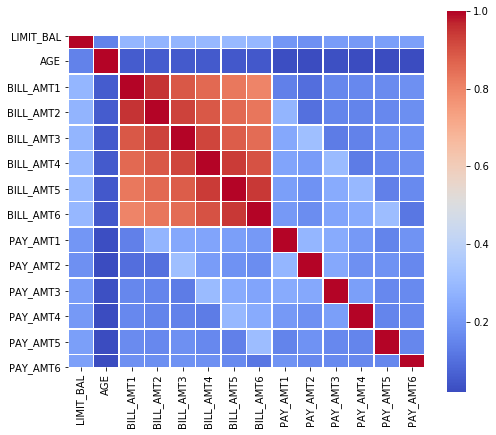

In [8]:
corr = rawData.corr()
f, ax = plt.subplots(figsize = (8, 7))
sns.heatmap(corr, 
            cbar = True,  
            square = True, 
            annot = False, 
            fmt = '.1f', 
            xticklabels = True, 
            yticklabels = True, 
            cmap = "coolwarm", 
            linewidths = .5, 
            ax = ax)

In [9]:
depVar = rawData['Default_Payment']

In [10]:
features = rawData.iloc[:,0:17]

In [11]:
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131


In [12]:
test_size = 0.30
seed = 1106
x_train, x_test = train_test_split(features, test_size= test_size, random_state=seed, shuffle=True)

In [13]:
x_train.shape, x_test.shape

((21000, 17), (9000, 17))

In [14]:
y_train, y_test = train_test_split(depVar, test_size= test_size, random_state=seed, shuffle=True)

In [15]:
y_train.shape, y_test.shape

((21000,), (9000,))

In [32]:
modelSVC = SVC(C=1.0, 
               cache_size=400, 
               degree=5, 
               gamma='auto_deprecated',
               verbose=True)

modelRF = RandomForestClassifier(bootstrap=True, 
                                 max_depth=10, 
                                 max_features='auto', 
                                 n_estimators=10, 
                                 n_jobs=10)

modelGBM = GradientBoostingClassifier(max_depth=4, 
                                      n_estimators=100,
                                      verbose=1)

In [33]:
#Random Forest

modelRF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=10,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [34]:
#Metricas Random Forest

print(cross_val_score(modelRF, x_train, y_train)) 
print(modelRF.score(x_train, y_train))

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81559777 0.81957143 0.81197314]
0.8533333333333334


In [35]:
#Support Vector Classifier

modelSVC.fit(x_train,y_train)

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=400, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [36]:
#Metricas Support Vector Cassifier

print(cross_val_score(modelSVC, x_train, y_train)) 
print(modelSVC.score(x_train, y_train))

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM][0.78160263 0.78057143 0.78111159]
0.9938571428571429


In [37]:
#Gradient Boosting Model

modelGBM.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0117            3.49s
         2           0.9830            3.40s
         3           0.9608            3.35s
         4           0.9433            3.30s
         5           0.9290            3.24s
         6           0.9171            3.21s
         7           0.9071            3.27s
         8           0.8990            3.23s
         9           0.8918            3.19s
        10           0.8852            3.16s
        20           0.8523            2.95s
        30           0.8381            2.69s
        40           0.8295            2.46s
        50           0.8236            2.10s
        60           0.8184            1.63s
        70           0.8136            1.18s
        80           0.8087            0.78s
        90           0.8045            0.38s
       100           0.8014            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=1,
                           warm_start=False)

In [38]:
#Metricas Linear Classifier
print(cross_val_score(modelGBM, x_train, y_train)) 
print(modelGBM.score(x_train, y_train))

/Users/roberto/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


      Iter       Train Loss   Remaining Time 
         1           1.0113            2.32s
         2           0.9825            2.45s
         3           0.9602            2.30s
         4           0.9425            2.22s
         5           0.9277            2.18s
         6           0.9155            2.13s
         7           0.9050            2.17s
         8           0.8965            2.14s
         9           0.8893            2.12s
        10           0.8823            2.14s
        20           0.8462            1.90s
        30           0.8298            1.63s
        40           0.8192            1.37s
        50           0.8096            1.14s
        60           0.8026            0.89s
        70           0.7965            0.66s
        80           0.7898            0.43s
        90           0.7839            0.21s
       100           0.7766            0.00s
      Iter       Train Loss   Remaining Time 
         1           1.0118            2.22s
        

In [39]:
#Prediciones con SVC
predictions = modelSVC.predict(x_test)

In [40]:
accurancy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

In [41]:
print('accurancy: %.3f' % accurancy)
print('Precision: %.3f' % precision)
print('score: %.3f' % score)


accurancy: 0.775
Precision: 0.682
score: 0.015


In [45]:
#Prediciones con RF
predictions = modelRF.predict(x_test)

In [46]:
accurancy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
score = recall_score(y_test, predictions)

In [47]:
print('accurancy: %.3f' % accurancy)
print('Precision: %.3f' % precision)
print('score: %.3f' % score)

accurancy: 0.812
Precision: 0.668
score: 0.344
